In [6]:
!pip install opendatasets

In [7]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/rjmanoj/credit-card-customer-churn-prediction")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: arnabsen1010
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/rjmanoj/credit-card-customer-churn-prediction


100%|██████████| 262k/262k [00:00<00:00, 120MB/s]

In [8]:
import numpy as np # linear algebra
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [9]:
df=pd.read_csv("/content/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [10]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [12]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
#one hot encoder
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [15]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [16]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [18]:
X_train_trf

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [19]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [32]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [38]:
history=model.fit(X_train_trf,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8339 - loss: 0.3818 - val_accuracy: 0.8406 - val_loss: 0.3747
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8364 - loss: 0.3724 - val_accuracy: 0.8462 - val_loss: 0.3717
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8491 - loss: 0.3613 - val_accuracy: 0.8444 - val_loss: 0.3699
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8488 - loss: 0.3566 - val_accuracy: 0.8469 - val_loss: 0.3671
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8496 - loss: 0.3590 - val_accuracy: 0.8487 - val_loss: 0.3642
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8534 - loss: 0.3510 - val_accuracy: 0.8512 - val_loss: 0.3610
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8630 - loss: 0.3387 - val_accuracy: 0.8531 - val_loss: 0.3583
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8546 - loss: 0.3495 - val_accu

In [39]:
#weights and biases of 1st layers
model.layers[0].get_weights()

[array([[ 4.90308218e-02,  6.04815602e-01, -1.44849613e-01,
         -1.74698114e-01,  7.48006552e-02, -1.41516209e-01,
          9.62925702e-02,  1.66249141e-01, -2.08097339e-01,
         -4.35237661e-02,  1.99364677e-01],
        [-7.46306598e-01, -1.67417377e-01,  6.29570410e-02,
         -1.52171642e-01, -2.36593142e-01,  5.15657783e-01,
          6.35589361e-02, -9.86713409e-01, -5.75254679e-01,
          4.36473310e-01,  7.04865217e-01],
        [-2.77604759e-02, -2.05926657e-01,  2.82563120e-01,
          1.24207944e-01,  1.20836273e-02, -2.24415157e-02,
          5.92090525e-02,  1.10072335e-02,  1.10885777e-01,
         -3.91134284e-02,  1.33586943e-01],
        [-1.80809647e-01, -4.99847293e-01,  2.47535005e-01,
         -7.05700397e-01, -5.68871081e-01,  7.89133832e-02,
         -2.89486945e-01,  3.92561138e-01, -5.25619864e-01,
          5.89789271e-01, -5.59615016e-01],
        [-7.15855658e-02, -4.54617053e-01, -2.95498334e-02,
         -1.05033085e-01, -1.35292542e+00,  

In [40]:
model.predict(X_test_trf)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.27329642],
       [0.23293293],
       [0.17209393],
       ...,
       [0.35355893],
       [0.1898629 ],
       [0.25006124]], dtype=float32)

In [41]:
#as sigmoid function was used so the values are ranging between 0 to 1
#to bring them in 0 or 1 format we will decide a threshold let's assume 0.5

In [42]:
y_log=model.predict(X_test_trf)
y_pred=np.where(y_log>0.5,1,0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [43]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8585

In [45]:
history.history

{'accuracy': [0.8353124856948853,
  0.840624988079071,
  0.8457812666893005,
  0.8490625023841858,
  0.8509374856948853,
  0.8526562452316284,
  0.8567187786102295,
  0.8570312261581421,
  0.8600000143051147,
  0.860156238079071,
  0.8604687452316284,
  0.8610937595367432,
  0.8618749976158142,
  0.8596875071525574,
  0.8637499809265137,
  0.8620312213897705,
  0.8617187738418579,
  0.8615624904632568,
  0.8618749976158142,
  0.8634374737739563,
  0.8620312213897705,
  0.8626562356948853,
  0.8650000095367432,
  0.8618749976158142,
  0.8631250262260437,
  0.8628125190734863,
  0.8650000095367432,
  0.8645312786102295,
  0.8637499809265137,
  0.8646875023841858,
  0.8639062643051147,
  0.8639062643051147,
  0.8645312786102295,
  0.8656250238418579,
  0.864062488079071,
  0.8650000095367432,
  0.8659374713897705,
  0.8639062643051147,
  0.8681250214576721,
  0.8651562333106995,
  0.8656250238418579,
  0.8667187690734863,
  0.8665624856948853,
  0.8653125166893005,
  0.8671875,
  0.866249

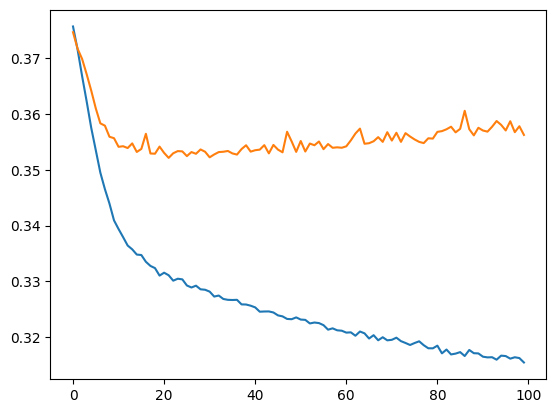

In [47]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

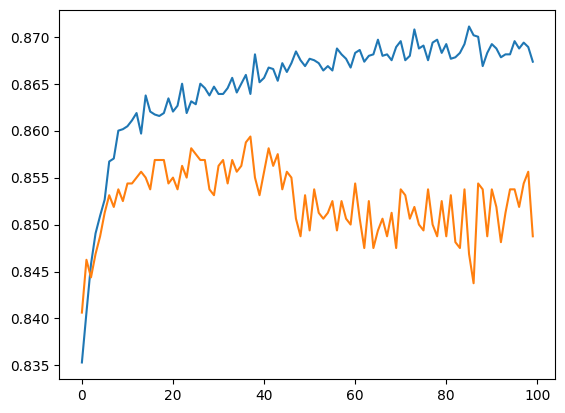

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])